In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
myset= pd.read_csv('Iris.csv')
myset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
myset=myset.drop(columns='Id')

In [6]:
myset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
myset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
myset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
myset.shape

(150, 5)

In [10]:
myset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

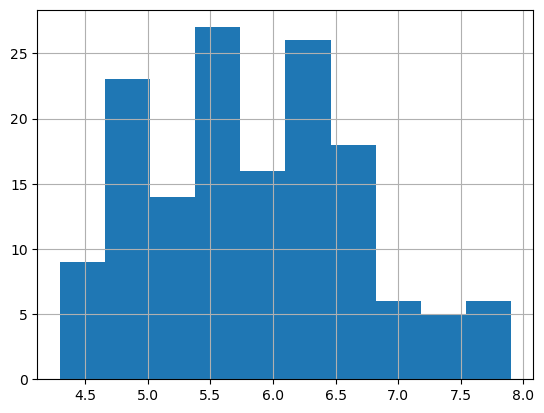

In [11]:
myset['SepalLengthCm'].hist()

<Axes: >

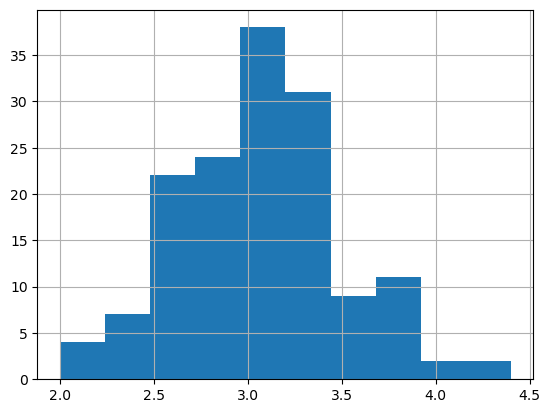

In [12]:
myset['SepalWidthCm'].hist()

In [13]:
colors= ['orange','violet','green']
species= ['Iris-virginica','Iris-versicolor','Iris-setosa']


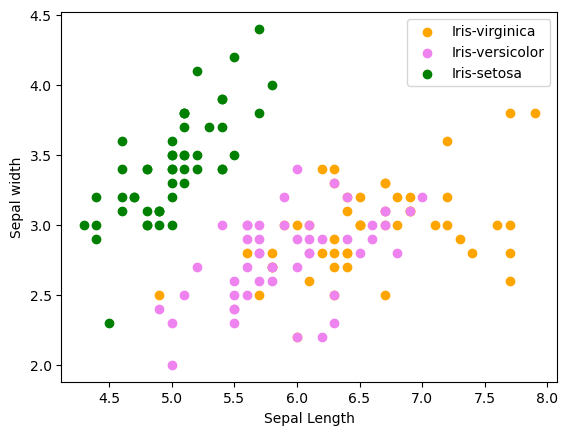

In [14]:
for i in range(3):
    x = myset[myset['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c= colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')
plt.legend()

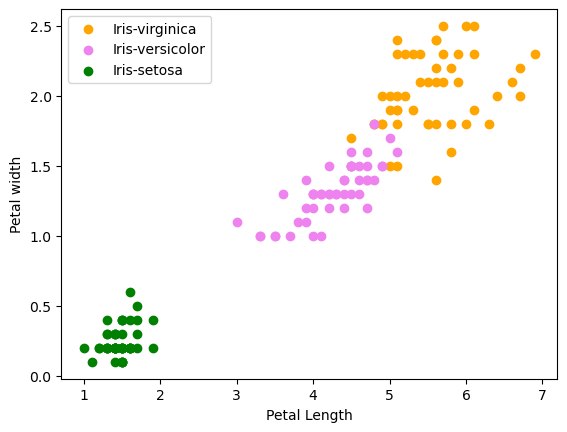

In [15]:
for i in range(3):
    x = myset[myset['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c= colors[i], label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal width')
plt.legend()

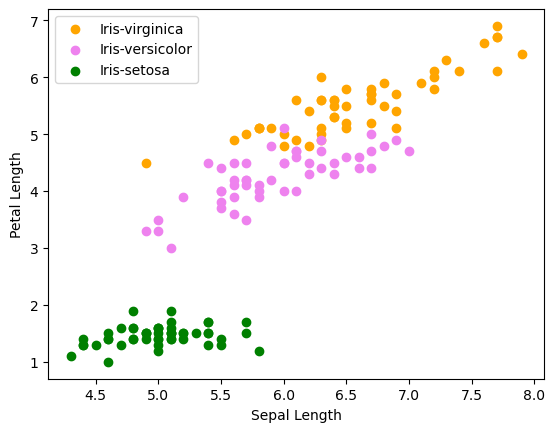

In [16]:
for i in range(3):
    x = myset[myset['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c= colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

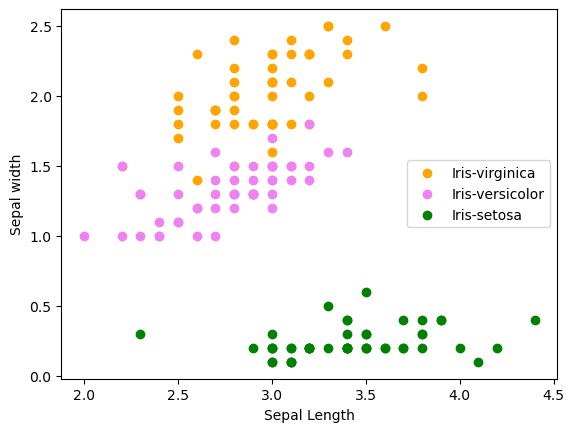

In [17]:
for i in range(3):
    x = myset[myset['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c= colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')
plt.legend()

<Axes: >

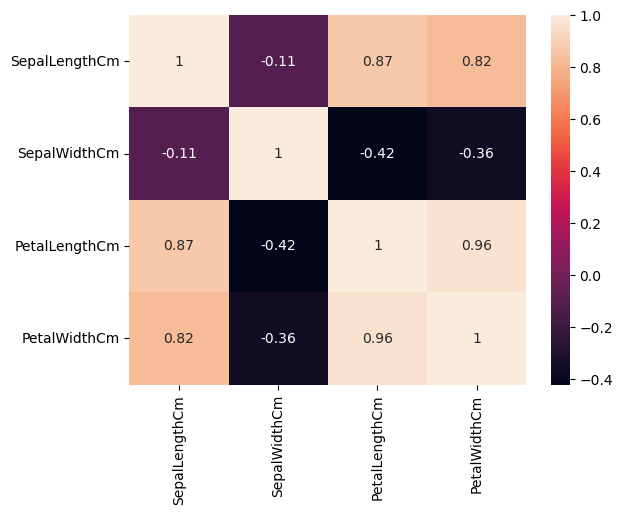

In [18]:
sb.heatmap(myset.iloc[:, 0:4].corr(), annot=True)

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
myset['Species']=le.fit_transform(myset['Species'])

In [21]:
myset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
from sklearn.model_selection import train_test_split


In [23]:
x=myset.drop(columns=['Species'])
y= myset['Species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4, random_state=0)

In [24]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression()

In [25]:
lg.fit(x_train,y_train)

LogisticRegression()

In [26]:
print("Accuracy:",lg.score(x_test,y_test)*100)

Accuracy: 91.66666666666666


In [27]:
from sklearn.neighbors import KNeighborsClassifier
knc= KNeighborsClassifier()

In [28]:
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
print("Accuracy : ",knc.score(x_test,y_test)*100)

Accuracy :  95.0


In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
print("Accuracy : ",dtc.score(x_test,y_test)*100)

Accuracy :  95.0
